# Proteomics Genes GO Enrichment Analysis

Gene ontology enrichment analysis was performed using the web application in the [*Broad Institute's Molecular Signature Database (MSigDB)*](http://software.broadinstitute.org/gsea/login.jsp;jsessionid=D4E7C89F9FAD3D013DA7360584637226) website. The data that were used are the proteomics data sets listed [here](https://github.com/hariesramdhani/winter-internship-2017/blob/master/data/protPDE.csv). This analysis was done in four steps; analysis of the first top 20 proteomics genes, then 50, then 100 and finally all of the genes with **qvalue < 0.05** (total of 283 genes).

The results of these analyses then are processed using Python `pandas`, `seaborn` and `matplotlib` library for the visualization of the heatmap. `math` library was used to calculate some mathematical operation, `re` for the works requiring regular expression and `os` for the `listdir()` function. Using GSEA, Molecular Function (`MF`), Biological Process (`BP`) and Cellular Component (`CC`) analyses were done.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import re

os.chdir('data/GO_prot')

In [2]:
# Create dictionary for molecular function (MF), biological process (bp) and cellular component(cc) data
protMFdict = {}
protBPdict = {}
protCCdict = {}

# Initialize variables with the most appearance in the code
pValue = 'pValue'
geneSet = 'GeneSet'

# Read data from the files and classify them into MF, BP and CC each
for filename in os.listdir():
    if filename.startswith('MF'):
        keyName = re.findall(r'MFTop(\S*).txt', filename)[0]
        protMFdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('BP'):
        keyName = re.findall(r'BPTop(\S*).txt', filename)[0]
        protBPdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('CC'):
        keyName = re.findall(r'CCTop(\S*).txt', filename)[0]
        protCCdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]

colNames = list(protMFdict.keys())
finColNames = [geneSet] + colNames

In [3]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
protBPs = colNames
protBPDF = protBPdict[protBPs[0]]
for protBP in protBPs[1:]:
    protBPDF = pd.merge(protBPDF, protBPdict[protBP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
protBPDF['# NaN'] = protBPDF.isnull().sum(axis=1)
protBPDF = protBPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protBPDF['GeneSet']]
protBPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    protBPDF[colName] = [-(math.log(pvals, 10)) for pvals in protBPDF[colName]]

protBPDF[finColNames]

,GeneSet,50,All,100,25
0,small molecule metabolic process,12.761954,46.869666,22.552842,6.677781
1,glycosyl compound metabolic process,6.829738,38.274088,15.821023,NaN
2,protein complex subunit organization,7.184422,24.198596,NaN,6.021363
3,organophosphate metabolic process,7.467246,39.028724,17.787812,NaN
4,phosphate containing compound metabolic process,6.876148,33.856985,14.943095,NaN
5,mitochondrial electron transport nadh to ubiqu...,6.869666,30.793174,17.681937,NaN
6,organonitrogen compound metabolic process,9.353596,47.365523,15.014574,NaN
7,purine containing compound metabolic process,9.376751,39.772113,18.163676,NaN
8,nucleobase containing small molecule metabolic...,10.924453,42.987163,18.477556,NaN
9,establishment of localization in cell,8.718967,24.815309,NaN,6.872895


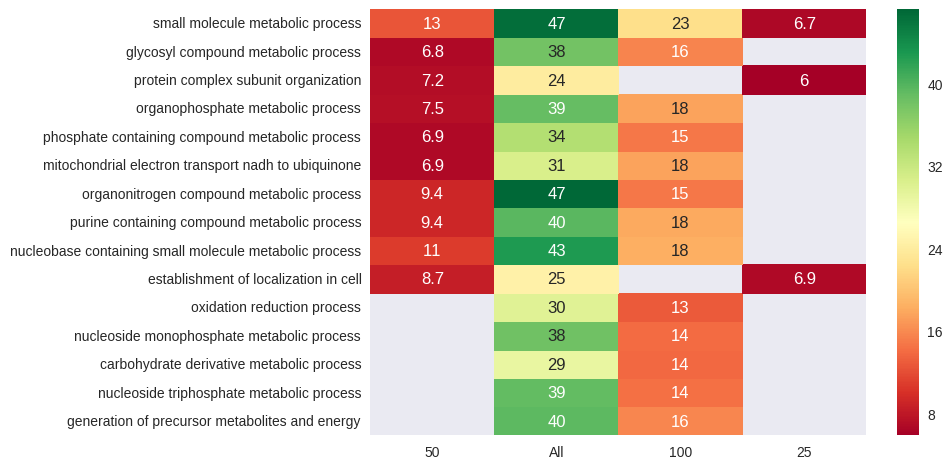

In [4]:
# Generate the heatmap of GSEA Biological Process
sns.heatmap(protBPDF.ix[:, 1:-1], cmap="RdYlGn", annot=True, yticklabels=list(protBPDF['GeneSet']))

In [5]:
# Merge the Top25, Top50, Top100 and TopAll Cellular Component data
protCCs = colNames
protCCDF = protCCdict[protCCs[0]]
for protCC in protCCs[1:]:
    protCCDF = pd.merge(protCCDF, protCCdict[protCC], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row    
protCCDF['# NaN'] = protCCDF.isnull().sum(axis=1)
protCCDF = protCCDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protCCDF['GeneSet']]
protCCDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    protCCDF[colName] = [-(math.log(pvals, 10)) for pvals in protCCDF[colName]]

protCCDF[finColNames]

,GeneSet,50,All,100,25
0,mitochondrion,13.341035,53.787812,20.258061,9.507240
1,mitochondrial part,9.458421,54.913640,19.469800,7.580044
2,neuron part,8.080399,28.991400,15.503070,7.917215
3,cell projection,7.388277,25.950782,13.168770,6.638272
4,cell body,7.215383,20.266001,13.832683,5.203426
5,mitochondrial matrix,6.498941,21.368556,9.924453,7.114639
6,neuron projection,6.139063,25.066007,11.655608,6.285670
7,inner mitochondrial membrane protein complex,5.246417,31.978811,11.679854,NaN
8,synapse,NaN,17.939302,8.962574,4.323306
9,respiratory chain,5.735182,37.393619,12.812479,NaN


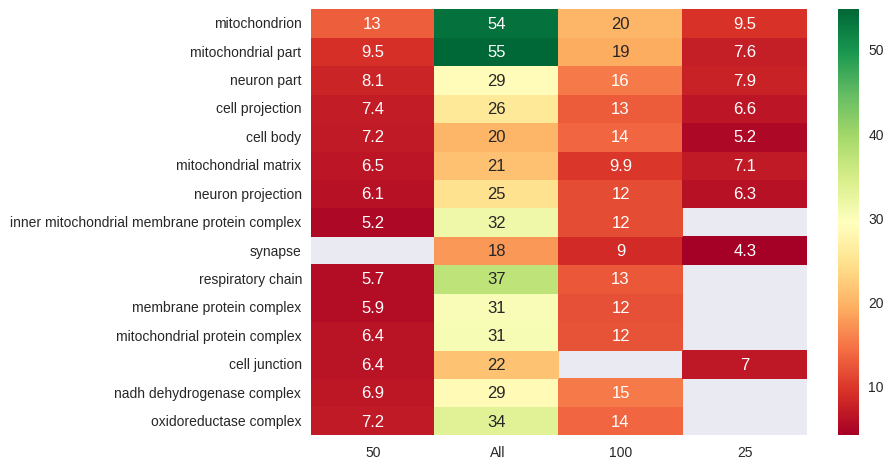

In [6]:
# Generate the heatmap of GSEA Cellular Component
sns.heatmap(protCCDF.ix[:, 1:-1], cmap="RdYlGn", annot=True, yticklabels=list(protCCDF['GeneSet']))

In [7]:
# Merge the Top25, Top50, Top100 and TopAll Molecular Function data
protMFs = colNames
protMFDF = protMFdict[protMFs[0]]
for protMF in protMFs[1:]:
    protMFDF = pd.merge(protMFDF, protMFdict[protMF], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row    
protMFDF['# NaN'] = protMFDF.isnull().sum(axis=1)
protMFDF = protMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protMFDF['GeneSet']]
protMFDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    protMFDF[colName] = [-(math.log(pvals, 10)) for pvals in protMFDF[colName]]

protMFDF[finColNames]

,GeneSet,50,All,100,25
0,nadh dehydrogenase activity,7.050610,25.361511,15.931814,3.705534
1,ribonucleotide binding,5.394695,19.554396,10.147520,3.400117
2,enzyme binding,4.021363,19.309804,9.856985,3.559091
3,oxidoreductase activity acting on nad p h quin...,6.490797,22.725842,14.590067,3.431798
4,oxidoreductase activity acting on nad p h,5.472370,21.457175,12.203426,NaN
5,syntaxin binding,5.472370,NaN,7.224754,4.747147
6,snare binding,4.920819,NaN,6.399027,4.333482
7,metal cluster binding,4.316953,NaN,4.917215,3.251037
8,identical protein binding,NaN,17.448550,5.634512,3.368556
9,cation transmembrane transporter activity,4.240332,11.970616,5.037631,NaN


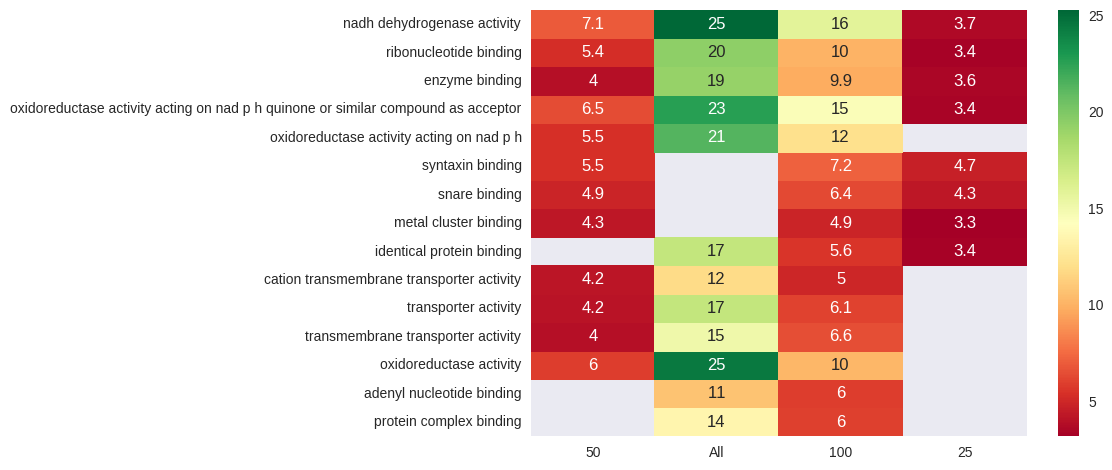

In [8]:
# Generate the heatmap of GSEA Molecular Function
sns.heatmap(protMFDF.ix[:, 1:-1], cmap="RdYlGn", annot=True, yticklabels=list(protMFDF['GeneSet']))